In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [2]:
df0 = pd.read_csv('../data/annual_csi_data_for_match.csv', sep=',')

to find systems that have data for multiple years:
rows need to have same lat/lon, capacity, and panelmodel(maybe not necessary but should include for redundancy)


# Data Cleaning

In [3]:
df0.rename(index=str, columns={"datatime": "datetime"}, inplace=True)
df0['datetime'] = pd.to_datetime(df0['datetime'])
df0.reset_index(drop = True, inplace = True)

In [13]:
# Make copy of raw import
df = df0.copy()

In [14]:
# Function for converting datetime data into just year
def dt_to_year(df):
    df['year'] = np.zeros(df.shape[0])
    for i, el in df['datetime'].iteritems():
        df.at[i,'year'] = el.year
    df['year'] = df['year'].astype(int)
    df.drop(['datetime'], axis=1, inplace=True)

In [15]:
dt_to_year(df)

In [18]:
df_11 = df[df['year'] == 2011]

In [20]:
df_11.shape

(1799, 19)

In [19]:
df_12 = df[df['year'] == 2012]

In [21]:
df_12.shape

(1922, 19)

In [38]:
l = ['a','b','c','d','e']

In [40]:
l.remove('b')

['a', 'c', 'd', 'e']

In [42]:
cols = list(df_11.columns)
cols

['lat',
 'lon',
 'city',
 'actualkwh',
 'irradiancekwh',
 'pr',
 'mount_type',
 'koeppen',
 'capacity_dc_kw',
 'tilt',
 'azimuth',
 'paneltype',
 'cellcategory',
 'cod',
 'invertermake',
 'invertermodel',
 'panelmake',
 'panelmodel',
 'year']

In [43]:
cols.remove('year')

In [52]:
df.loc[:,['cod','tilt']].head()

,cod,tilt
0,2008-09-05,30.0
1,2008-09-05,30.0
2,2007-08-01,30.0
3,2007-08-01,30.0
4,2007-10-15,30.0


In [64]:
colz = ['lat', 'lon','city_y',
       'actualkwh_y', 'irradiancekwh_y', 'pr_y', 'mount_type_y', 'koeppen_y',
       'tilt_y', 'azimuth_y', 'paneltype_y', 'cellcategory_y', 'cod_y',
       'invertermake_y', 'invertermodel_y', 'panelmake_y', 'panelmodel_y',
       'year_y']

In [72]:
len(colz)


18

In [75]:
colzz=['lat',
 'lon',
 'city',
 'actualkwh',
 'irradiancekwh',
 'pr',
 'mount_type',
 'koeppen',
 'capacity_dc_kw',
 'tilt',
 'azimuth',
 'paneltype',
 'cellcategory',
 'cod',
 'invertermake',
 'invertermodel',
 'panelmake',
 'panelmodel',
 'year']

False

In [69]:
'city_y'.rstrip('_y')

'cit'

In [68]:
for i in colz[2:]:
    i.rstrip("y")

['lat',
 'lon',
 'city_y',
 'actualkwh_y',
 'irradiancekwh_y',
 'pr_y',
 'mount_type_y',
 'koeppen_y',
 'tilt_y',
 'azimuth_y',
 'paneltype_y',
 'cellcategory_y',
 'cod_y',
 'invertermake_y',
 'invertermodel_y',
 'panelmake_y',
 'panelmodel_y',
 'year_y']

In [ ]:
for row in df_11:
    for row2 in df_12:
        if row[[]]

In [53]:
df_11_12 = pd.merge(df_11,df_12,on=['lat','lon','capacity_dc_kw'])

In [57]:
df_11_12.columns

Index(['lat', 'lon', 'city_x', 'actualkwh_x', 'irradiancekwh_x', 'pr_x',
       'mount_type_x', 'koeppen_x', 'capacity_dc_kw', 'tilt_x', 'azimuth_x',
       'paneltype_x', 'cellcategory_x', 'cod_x', 'invertermake_x',
       'invertermodel_x', 'panelmake_x', 'panelmodel_x', 'year_x', 'city_y',
       'actualkwh_y', 'irradiancekwh_y', 'pr_y', 'mount_type_y', 'koeppen_y',
       'tilt_y', 'azimuth_y', 'paneltype_y', 'cellcategory_y', 'cod_y',
       'invertermake_y', 'invertermodel_y', 'panelmake_y', 'panelmodel_y',
       'year_y'],
      dtype='object')

In [77]:
df_12_raw = df_11_12[['lat', 'lon','city_y',
       'actualkwh_y', 'irradiancekwh_y', 'pr_y', 'mount_type_y', 'koeppen_y','capacity_dc_kw',
       'tilt_y', 'azimuth_y', 'paneltype_y', 'cellcategory_y', 'cod_y',
       'invertermake_y', 'invertermodel_y', 'panelmake_y', 'panelmodel_y',
       'year_y']]

In [79]:
df_12_raw.columns = ['lat',
 'lon',
 'city',
 'actualkwh',
 'irradiancekwh',
 'pr',
 'mount_type',
 'koeppen',
 'capacity_dc_kw',
 'tilt',
 'azimuth',
 'paneltype',
 'cellcategory',
 'cod',
 'invertermake',
 'invertermodel',
 'panelmake',
 'panelmodel',
 'year']

In [84]:
df_12_raw.shape

(1009, 19)

In [85]:
df_11_raw = df_11_12[['lat', 'lon', 'city_x', 'actualkwh_x', 'irradiancekwh_x', 'pr_x',
       'mount_type_x', 'koeppen_x', 'capacity_dc_kw', 'tilt_x', 'azimuth_x',
       'paneltype_x', 'cellcategory_x', 'cod_x', 'invertermake_x',
       'invertermodel_x', 'panelmake_x', 'panelmodel_x', 'year_x']]

In [88]:
df_11_raw.columns = ['lat',
 'lon',
 'city',
 'actualkwh',
 'irradiancekwh',
 'pr',
 'mount_type',
 'koeppen',
 'capacity_dc_kw',
 'tilt',
 'azimuth',
 'paneltype',
 'cellcategory',
 'cod',
 'invertermake',
 'invertermodel',
 'panelmake',
 'panelmodel',
 'year']

In [92]:
boolz = (df_11_raw.iloc[:,:-1]==df_12_raw.iloc[:,:-1])

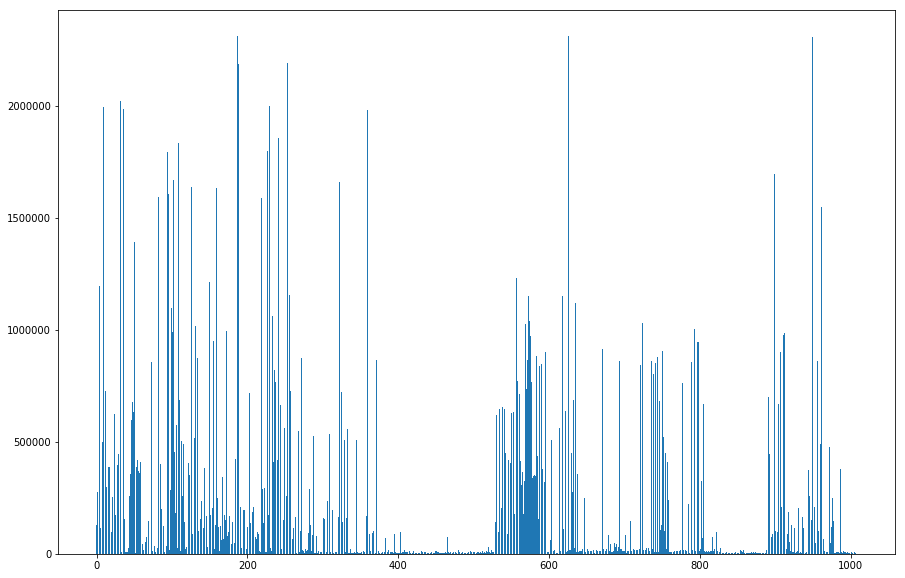

In [108]:
plt.figure(figsize=(15,10))
plt.bar(df_11_raw.index, df_11_raw['actualkwh']);

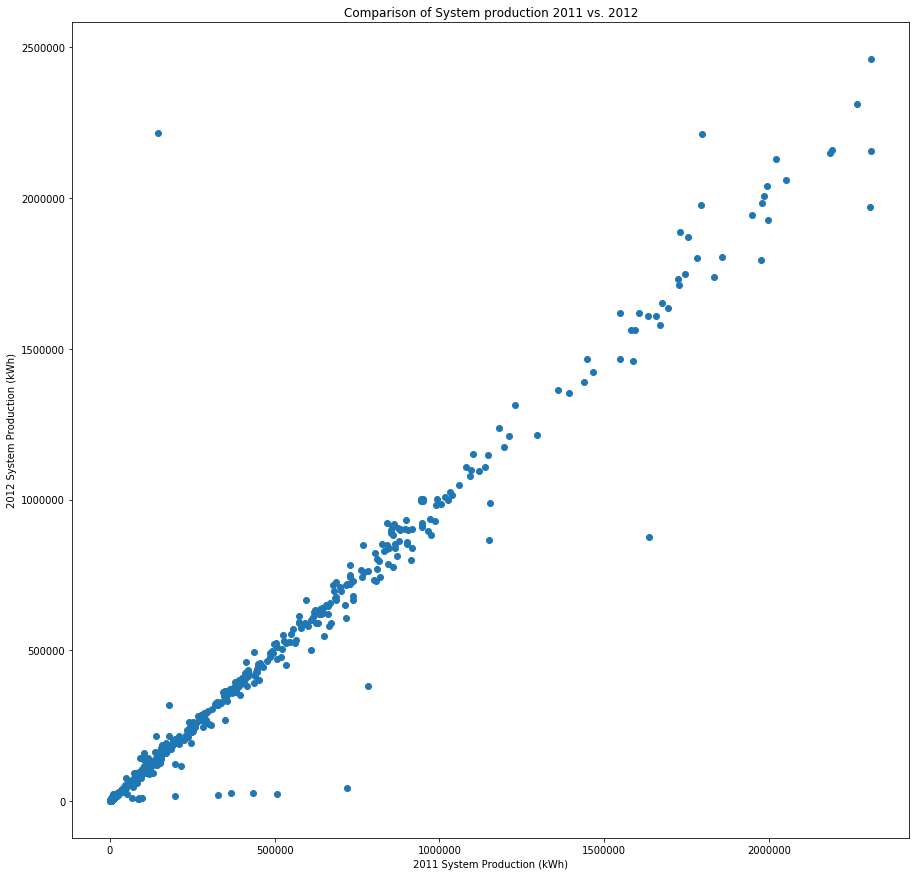

In [112]:
plt.figure(figsize=(15,15))
plt.scatter(df_11_raw['actualkwh'],df_12_raw['actualkwh'])
plt.xlabel('2011 System Production (kWh)')
plt.ylabel('2012 System Production (kWh)')
plt.title('Comparison of System production 2011 vs. 2012');

In [113]:
df = df_11_raw

In [114]:
# Convert lat/lon to 2 decimals for NASA API
df.reset_index(drop = True, inplace = True)
df['lat'] = round(df['lat'],2)
df['lon'] = round(df['lon'],2)

/home/matchdt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/matchdt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Save this df for NASA data to match lat/lon/year in 'Nasa weather merge script'

In [118]:
df.to_csv('readyforweath_2011.csv',index=False)

### (cont. cleaning)

In [8]:
def clean_data(df):    
    drop_list = ['city', 'cod', 'panelmodel','invertermodel','pr','lon','invertermake','panelmake']
    df.drop(drop_list, axis=1, inplace=True)
    df.paneltype.fillna(value = 'poly', inplace=True)
    df.mount_type.fillna(value = 'Fixed - Roof Mounted', inplace=True)
    df['cellcategory'].replace('Unknown', 'Standard', inplace=True)
    df['azimuth'].replace('Mixed', 180, inplace=True)
    df['azimuth'] = df['azimuth'].astype(float)
    df['tilt'].replace('Mixed', round(df['lat'],1),inplace=True)
    df['tilt'] = df['tilt'].astype(float)
    df['lat'] = round(df['lat'],1)
    
    # Get opt tilt & azimuth
    tilt = df['tilt'].values.astype(float)
    lat = df['lat'].values.astype(float)
    az = df['azimuth'].values
    df['opt_tilt'] = abs(tilt-lat)
    df['opt_az'] = abs(az-180)
    
    #Group panel types != poly/mono to other
    for i, el in df['paneltype'].iteritems():
        if el not in ['poly','mono']:
            df.at[i,'paneltype']='other'
    return df

In [9]:
df = clean_data(df)

In [10]:
df = pd.get_dummies(df,columns = ['mount_type','koeppen','paneltype','cellcategory'], drop_first=True)

In [11]:
cols = ['actualkwh','capacity_dc_kw','opt_tilt','opt_az', 
       'mount_type_Fixed - Roof Mounted', 'koeppen_Moderate', 'paneltype_other', 'paneltype_poly',
        'cellcategory_Premium', 'cellcategory_Standard',
       'cellcategory_Thin Film']
df = df.reindex(cols, axis=1)

In [ ]:
df.to_csv('data/df_kg_final.csv',index=False)

# Let's join the NASA data

In [14]:
nasa = pd.read_csv('../data/nasa_weather.csv')
csi = pd.read_csv('../data/df_kg_final.csv')

In [15]:
print(nasa.shape, csi.shape)

(8157, 6) (8157, 11)


In [16]:
df_csi_nasa = csi.join(nasa)

In [ ]:
df_csi_nasa.to_csv('../data/df_csi_nasa.csv',index=False)

In [ ]:
df_csi_nasa.shape

# EDA: Let's look at the data

In [119]:
df = pd.read_csv('../data/df_csi_nasa.csv')

In [122]:
df.columns

Index(['actualkwh', 'capacity_dc_kw', 'opt_tilt', 'opt_az',
       'mount_type_Fixed - Roof Mounted', 'koeppen_Moderate',
       'paneltype_other', 'paneltype_poly', 'cellcategory_Premium',
       'cellcategory_Standard', 'cellcategory_Thin Film', 'ALLSKY_SFC_SW_DWN',
       'KT', 'PRECTOT', 'PS', 'T2M', 'WS2M'],
      dtype='object')

### Distributions

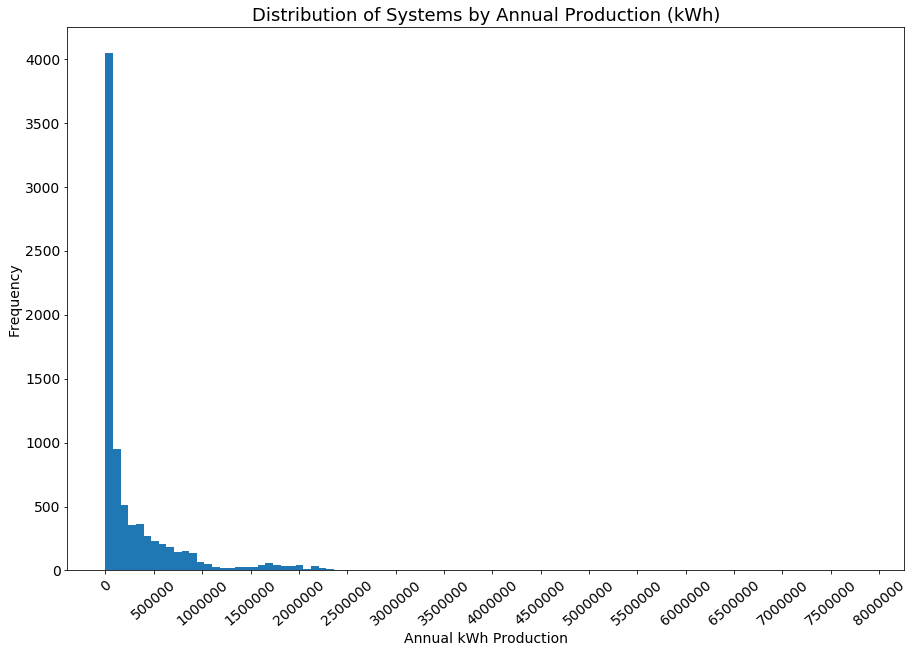

In [16]:
hist_x = df['actualkwh'].values
fig = plt.figure(figsize=(15,10))
plt.xlabel('Annual kWh Production', fontsize='14')
plt.ylabel('Frequency',fontsize='14')
plt.yticks(fontsize='14')
plt.xticks(np.linspace(0,8000000,17), fontsize='14', rotation='40')
plt.title('Distribution of Systems by Annual Production (kWh)', fontsize='18')
plt.hist(hist_x, bins=100);

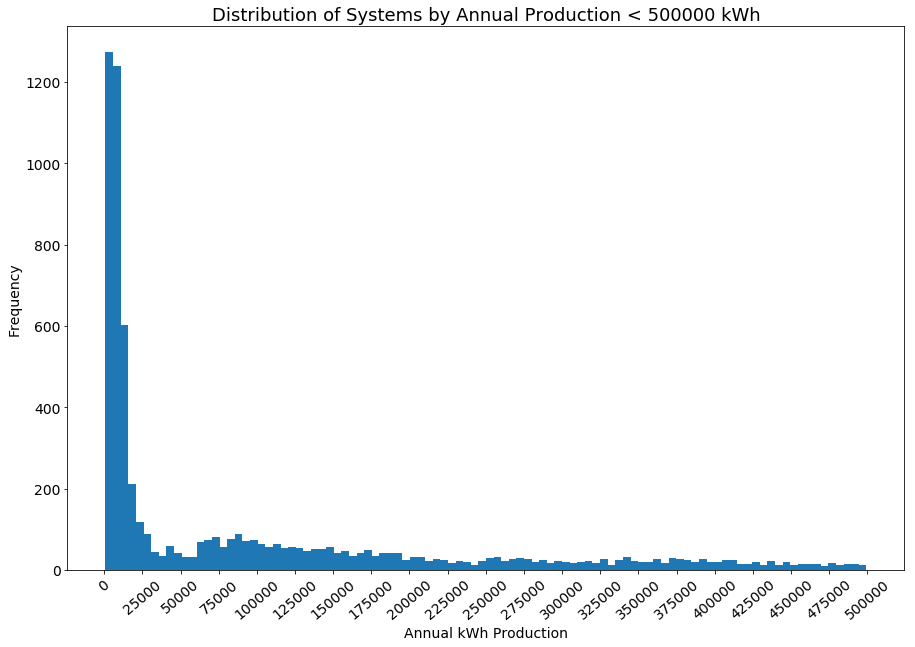

In [17]:
hist_x = df['actualkwh'][df['actualkwh']<500000].values
fig = plt.figure(figsize=(15,10))
plt.xlabel('Annual kWh Production', fontsize='14')
plt.ylabel('Frequency', fontsize='14')
plt.xticks(np.linspace(0,500000,21), fontsize='14', rotation='40')
plt.yticks(fontsize='14')
plt.title('Distribution of Systems by Annual Production < 500000 kWh', fontsize='18')
plt.hist(hist_x, bins=100);

In [ ]:
hist_x = df['actualkwh'][df['actualkwh']<50000].values
fig = plt.figure(figsize=(15,10))
plt.xlabel('Annual kWh Production', fontsize='14')
plt.ylabel('Frequency', fontsize='14')
plt.xticks(np.linspace(0,50000,21), fontsize='14', rotation='40')
plt.yticks(fontsize='14')
plt.title('Distribution of Systems by Annual Production < 50000 kWh', fontsize='18')
plt.hist(hist_x, bins=50);

In [ ]:
hist_x = df['capacity_dc_kw'].values
fig = plt.figure(figsize=(15,10))
plt.xlabel('System Capacity (kW)', fontsize='14')
plt.ylabel('Frequency', fontsize='14')
plt.yticks(fontsize='14')
plt.xticks(np.linspace(0,4000,17),fontsize='14', rotation='50')
plt.title('Distribution of Systems by System Capacity (kW)', fontsize='18')
plt.hist(hist_x, bins=100);

In [ ]:
hist_x = df['capacity_dc_kw'][df['capacity_dc_kw']<600].values
fig = plt.figure(figsize=(15,10))
plt.xlabel('System Capacity (kW)', fontsize='14')
plt.ylabel('Frequency', fontsize='14')
plt.yticks(fontsize='14')
plt.xticks(np.linspace(0,600,25), fontsize='14', rotation='50')
plt.title('Distribution of Systems by System Capacity < 600 kW', fontsize='18')
plt.hist(hist_x, bins=100);

In [ ]:
hist_x = df['capacity_dc_kw'][df['capacity_dc_kw']<50].values
fig = plt.figure(figsize=(15,10))
plt.xlabel('System Capacity (kW)', fontsize='14')
plt.ylabel('Frequency', fontsize='14')
plt.yticks(fontsize='14')
plt.xticks(np.linspace(0,50,11), fontsize='14', rotation='50')
plt.title('Distribution of Systems by System Capacity < 50 kW', fontsize='18')
plt.hist(hist_x, bins=50);

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(df['capacity_dc_kw'].values, df['actualkwh'].values, s=3)
plt.title("Capacity vs Output for All Systems",fontsize='18')
# plt.yticks(np.linspace(0,900000,19))
plt.xticks(np.linspace(0,5000,21), fontsize='14', rotation='50')
plt.xlabel("System Capacity (kW)",fontsize='14')
plt.ylabel("Actual Annual Output (kWh)",fontsize='14');

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(df['capacity_dc_kw'][df['capacity_dc_kw']<250].values, df['actualkwh'][df['capacity_dc_kw']<250].values, s=10)
plt.title("Capacity vs Output for Systems < 250 kW",fontsize='18')
# plt.yticks(np.linspace(0,900000,19))
plt.xticks(np.linspace(0,250,11), fontsize='14', rotation='50')
plt.xlabel("System Capacity (kW)",fontsize='14')
plt.ylabel("Actual Annual Output (kWh)",fontsize='14');

### Looks like there are cases of over reporting production. Let's remove the outliers

In [18]:
df['efficiency'] = df['actualkwh'] / df['capacity_dc_kw']

eff_std = df.efficiency.std()
eff_mean = df.efficiency.mean()

In [19]:
# Removing outliers > 4 std devs away from mean
efficiency_mask = np.abs((eff_mean - df['efficiency'])/eff_std) < 4

df = df.loc[efficiency_mask, :]
print(df.shape)

(8146, 18)


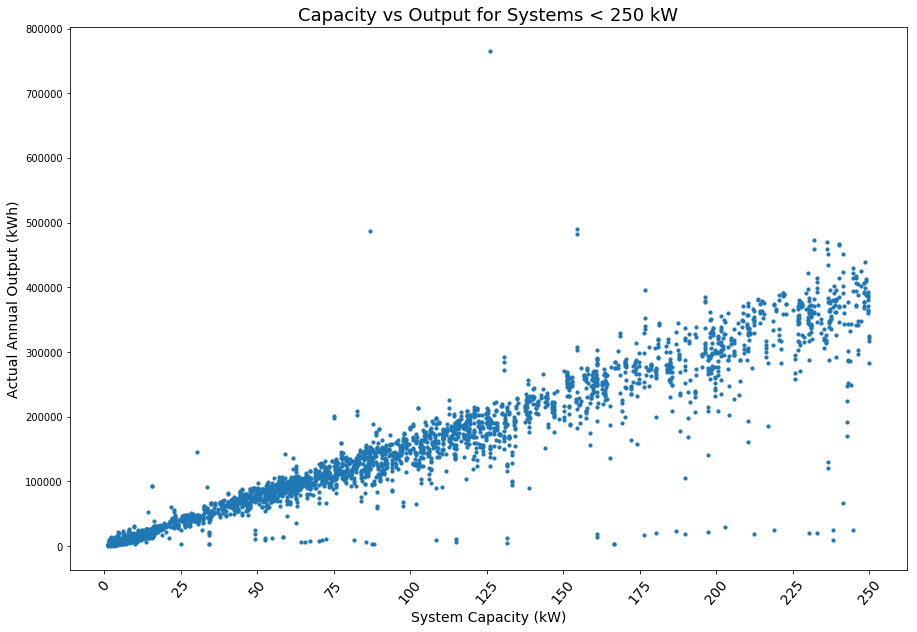

In [20]:
plt.figure(figsize=(15,10))
plt.scatter(df['capacity_dc_kw'][df['capacity_dc_kw']<250].values, df['actualkwh'][df['capacity_dc_kw']<250].values, s=10)
plt.title("Capacity vs Output for Systems < 250 kW",fontsize='18')

plt.xticks(np.linspace(0,250,11), fontsize='14', rotation='50')
plt.xlabel("System Capacity (kW)",fontsize='14')
plt.ylabel("Actual Annual Output (kWh)",fontsize='14');

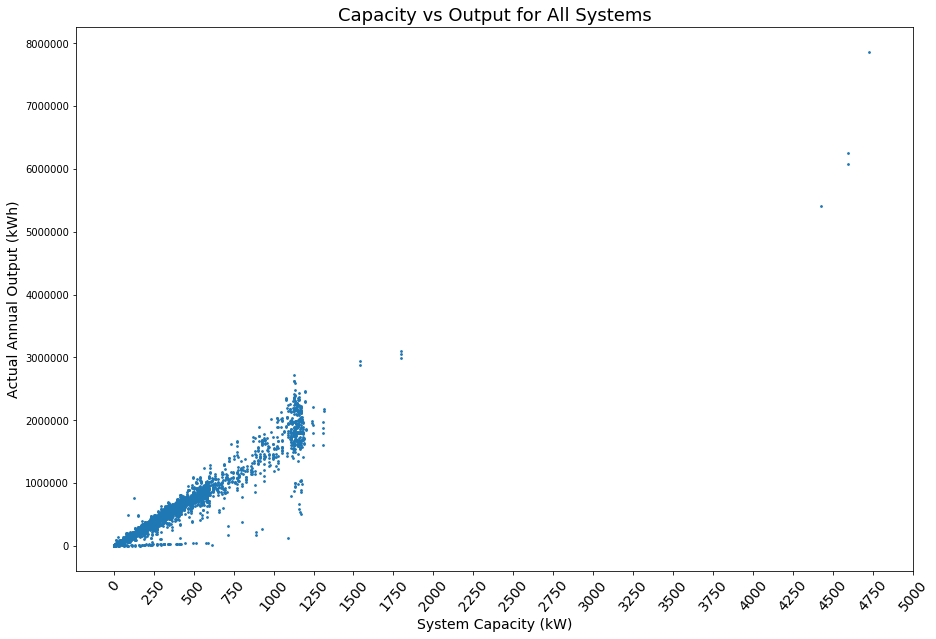

In [21]:
plt.figure(figsize=(15,10))
plt.scatter(df['capacity_dc_kw'].values, df['actualkwh'].values, s=3)
plt.title("Capacity vs Output for All Systems",fontsize='18')

plt.xticks(np.linspace(0,5000,21), fontsize='14', rotation='50')
plt.xlabel("System Capacity (kW)",fontsize='14')
plt.ylabel("Actual Annual Output (kWh)",fontsize='14');

In [22]:
# drop efficiency metric before we export for modeling
df.drop('efficiency', axis=1, inplace=True)


In [ ]:
df.to_csv('../data/df_for_modeling.csv', index=False)

# Modeling

### 1. Baseline (mean)

In [23]:
df_base0 = pd.read_csv('../data/df_for_modeling.csv')
df_base = df_base0.copy()

In [24]:
y = df_base.pop('actualkwh')

df_base['mean'] = np.mean(y)
y_mean = df_base.pop('mean')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(y_mean, y, train_size=.75, test_size=.25, random_state=42)

In [26]:
r2 = r2_score(y_test, X_test)
print('Baseline R-squared:',round(r2,3))

Baseline R-squared: -0.0


In [27]:
base_mse = mean_squared_error(y_test, X_test)
print('Baseline rmse:',round(base_mse**.5,1))

Baseline rmse: 477643.5


numpy.ndarray

In [35]:
print('Baseline Mean Absolute Error: ', mean_absolute_error(y_test,X_test))

Baseline Mean Absolute Error:  321680.13324377


321680.13324377

### 2. Linear Regression

In [36]:
df = df_base0.copy()
y = df.pop('actualkwh')
X = df

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=.75, test_size=.25, random_state=42)

In [38]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
r2 = linreg.score(X_test, y_test)
print('LR R-squared:',round(r2,3))

LR R-squared: 0.963


In [39]:
y_pred = linreg.predict(X_test)
lr_mse = mean_squared_error(y_test,y_pred)
print('LR rmse: ',round(lr_mse**.5,1))

LR rmse:  91354.7


In [45]:
print('LR Mean Absolute Error: ', round(mean_absolute_error(y_test,y_pred)))

LR Mean Absolute Error:  36041.0


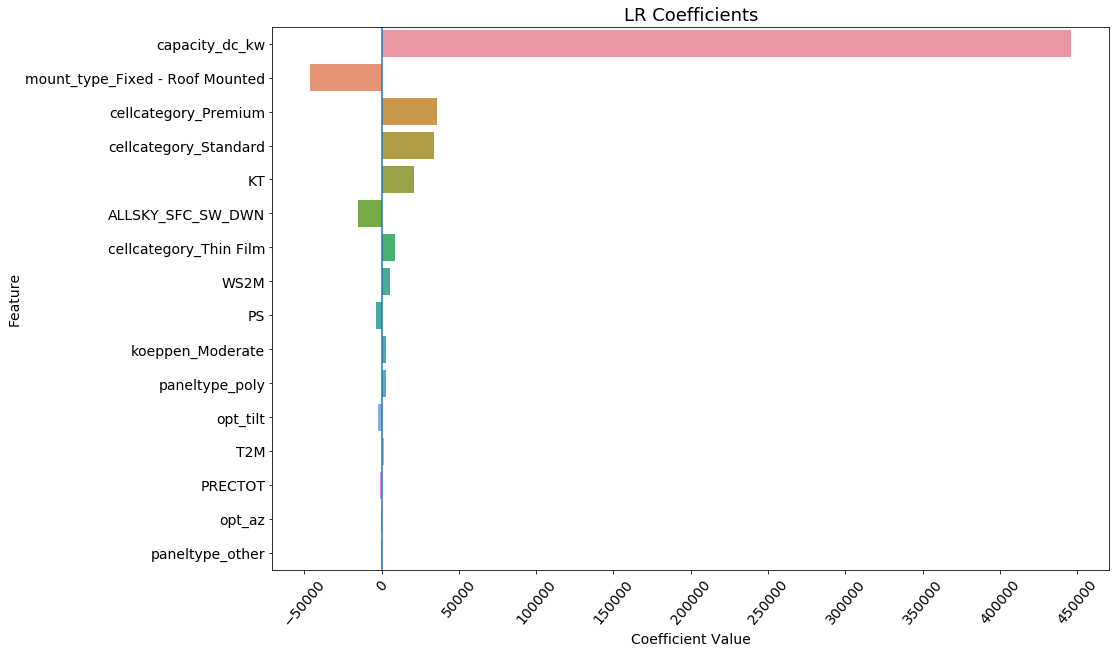

In [40]:
# Plot coefficients
coefs = pd.DataFrame({
    'feature': X.columns,
    'coefficient': linreg.coef_,
    'abs_coef': np.abs(linreg.coef_)
})
coefs.sort_values('abs_coef', inplace=True, ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x=coefs.coefficient.head(16), y=coefs.feature.head(16), orient='h')

plt.axvline(x=0)
plt.title("LR Coefficients", fontsize='18')
plt.ylabel('Feature', fontsize='14')
plt.yticks(fontsize='14')
plt.xticks(np.linspace(-50000,450000,11), rotation=50,fontsize='14')
plt.xlabel('Coefficient Value', fontsize='14');

In [ ]:
coefs

In [ ]:
# Pickle LR model

In [ ]:
pickle.dump(linreg, open('linreg_model_final.pkl', 'wb'))

### 3. Elastic Net

In [46]:
# Can use same train/test split data
# Grid Search
params = {
    'alpha': np.linspace(.001,.1,10),
    'l1_ratio': np.linspace(0,1,5)
}
en = ElasticNet()
gs_en = GridSearchCV(en, params, cv=3, verbose=1, n_jobs = 4)

gs_en.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

GridSearchCV(cv=3, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'alpha': array([0.001, 0.012, 0.023, 0.034, 0.045, 0.056, 0.067, 0.078, 0.089,
       0.1  ]), 'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [47]:
gs_en_bestr2 = gs_en.best_score_
gs_en_params = gs_en.best_params_
gs_en_r2_test = gs_en.score(X_test, y_test)
print('gs_en_bestr2:',gs_en_bestr2)
print('gs_en_params:',gs_en_params)
print('gs_en_r2_test:',gs_en_r2_test)

gs_en_bestr2: 0.9570872102670378
gs_en_params: {'alpha': 0.012, 'l1_ratio': 0.75}
gs_en_r2_test: 0.9633752933164423


In [48]:
en = ElasticNet(alpha= .012, l1_ratio=.75)
en.fit(X_train, y_train)

ElasticNet(alpha=0.012, copy_X=True, fit_intercept=True, l1_ratio=0.75,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
en_r2 = en.score(X_test, y_test)
print('EN R-squared:',round(en_r2,3))
y_pred = en.predict(X_test)
en_mse = mean_squared_error(y_test,y_pred)
print('EN rmse: ',round(en_mse**.5,1))
print('EN Mean Absolute Error: ', round(mean_absolute_error(y_test,y_pred)))

EN R-squared: 0.963
EN rmse:  91408.1
EN Mean Absolute Error:  36065.0


In [ ]:
coefs_en = pd.DataFrame({
    'feature': X.columns,
    'coefficient': en.coef_,
    'abs_coef': np.abs(en.coef_)
})
coefs_en.sort_values('abs_coef', inplace=True, ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x=coefs.coefficient.head(16), y=coefs.feature.head(16), orient='h')

plt.axvline(x=0)
plt.title("Elastic Net Coefficients", fontsize='18')
plt.ylabel('Feature', fontsize='14')
plt.yticks(fontsize='14')
plt.xticks(np.linspace(-50000,450000,11), rotation=50,fontsize='14')
plt.xlabel('Coefficient Value', fontsize='14');

In [ ]:
coefs_en

In [52]:
pickle.dump(en, open('../pickled models/en_model_final.pkl', 'wb'))

### 4. Random Forest

In [53]:
# No scaling necessary
df_rf = df_base0.copy()
y = df_rf.pop('actualkwh')
X = df_rf

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, test_size=.25, random_state=42)

In [55]:
# Creating gridsearch to find optimal parameters.
params = {
    'max_depth': np.linspace(50,150,6),
    'n_estimators': np.linspace(100,400,4, dtype=int)
}

rf = RandomForestRegressor()
gs_rf = GridSearchCV(rf, params, cv=3, verbose=1,n_jobs=1)

In [56]:
gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 12.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 50.,  70.,  90., 110., 130., 150.]), 'n_estimators': array([100, 200, 300, 400])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [57]:
gs_rf_bestr2 = gs_rf.best_score_
gs_rf_params = gs_rf.best_params_
gs_rf_r2_test = gs_rf.score(X_test, y_test)
print('gs_rf_bestr2:',gs_rf_bestr2)
print('gs_rf_params:',gs_rf_params)
print('gs_rf_r2_test:',gs_rf_r2_test)

gs_rf_bestr2: 0.955544658131921
gs_rf_params: {'max_depth': 150.0, 'n_estimators': 100}
gs_rf_r2_test: 0.9743987958322171


In [58]:
rf = RandomForestRegressor(max_depth=70, n_estimators=100,n_jobs=4)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=70,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
rf_r2 = rf.score(X_test, y_test)
print('RF R-squared:',round(rf_r2,3))
y_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test,y_pred)
print('RF rmse: ',round(rf_mse**.5,1))
print('RF Mean Absolute Error: ', round(mean_absolute_error(y_test,y_pred)))

RF R-squared: 0.975
RF rmse:  75555.5
RF Mean Absolute Error:  26315.0


In [ ]:
feature_imports = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})

feature_imports.sort_values('importance', inplace=True, ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x=feature_imports.importance.head(16), y=feature_imports.feature.head(16), orient='h')
sns.set_style('white')
sns.despine(offset=10, trim=False)
plt.title('Random Forest Feature Importance', fontsize='18')
plt.xlabel('Importance Value',fontsize='14')
plt.ylabel('Feature',fontsize='14');

In [ ]:
feature_imports = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})

feature_imports.sort_values('importance', inplace=True, ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x=feature_imports.importance.tail(15), y=feature_imports.feature.tail(15), orient='h')
sns.set_style('white')
sns.despine(offset=10, trim=False)
plt.title('Random Forest Feature Importance', fontsize='18')
plt.xlabel('Importance Value',fontsize='14')
plt.ylabel('Feature',fontsize='14');

In [60]:
pickle.dump(en, open('../pickled models/rf_model_final.pkl', 'wb'))